## Importing the various libraries and Titanic passenger dataset

In [1]:
# importing the python libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# importing the dataset
df1=pd.read_csv('titanic.csv')

## Reading the dataset

In [2]:
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df1.shape

(891, 12)

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
print("Possible outcome under 'Survived' field: ")
print(df1['Survived'].value_counts())

print("Possible outcome under 'Pclass' field: ")
print(df1['Pclass'].value_counts())

print("Possible outcome under 'Sex' field: ")
print(df1['Sex'].value_counts())

print("Possible outcome under 'SibSp' field: ")
print(df1['SibSp'].value_counts())

print("Possible outcome under 'Parch' field: ")
print(df1['Parch'].value_counts())

print("Possible outcome under 'Embarked' field: ")
print(df1['Embarked'].value_counts())

Possible outcome under 'Survived' field: 
0    549
1    342
Name: Survived, dtype: int64
Possible outcome under 'Pclass' field: 
3    491
1    216
2    184
Name: Pclass, dtype: int64
Possible outcome under 'Sex' field: 
male      577
female    314
Name: Sex, dtype: int64
Possible outcome under 'SibSp' field: 
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64
Possible outcome under 'Parch' field: 
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64
Possible outcome under 'Embarked' field: 
S    644
C    168
Q     77
Name: Embarked, dtype: int64


In [6]:
df1.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Inference
- The dataset has 891 rows (representing 891 passenger details) and 12 columns (parameters)
- Categorical fields: Survived, Pclass, Sex, SibSp, Parch, Embarked
- Numerical fields: Age, Fare
- other fields: PassengerId, Name, Cabin, Ticket have unique values and will not be useful for finding any pattern in the dataset
- Out of 891 passengers, 342 survived and 549 died
- There were 3 different Pclasses
- There were 3 different Embarkment points
- more than 70% of the passengers were travelling on their own without any companions
- we have many null values in Age and Cabin fields, two null values in Embarked field. Will have to treat these null values.

## Treating Null values

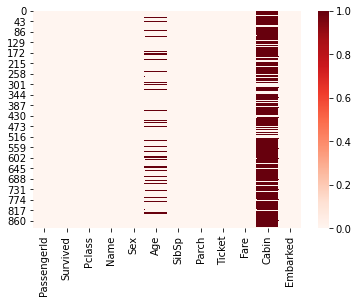

In [7]:
# checking the distribution of null values through heatmap

sns.heatmap(df1.isnull(), cmap='Reds')
plt.show()

In [8]:
# proportion of null values in the three datafields

print("% of null values under Age: ",(df1['Age'].isnull().sum()/len(df1))*100)
print("% of null values under Cabin: ",(df1['Cabin'].isnull().sum()/len(df1))*100)
print("% of null values under Embarked: ",(df1['Embarked'].isnull().sum()/len(df1))*100)

% of null values under Age:  19.865319865319865
% of null values under Cabin:  77.10437710437711
% of null values under Embarked:  0.22446689113355783


## Inference
- There are too many missing values (77%) under Cabin field. It is better to drop this field.
- There are 20% missing values under Age. Since Age is a numerical field, it might lead us to some pattern. Hence, we cannot drop this field and will have to treat the missing values.
- There are only 2 missing values under Embarked. Even if this field is not treated, it will not lead to any difference in the data.

In [9]:
# creating a copy of the original dataset and dropping the Cabin field from it
df2=df1.copy()
df2.drop('Cabin', axis=1, inplace=True)
df2.head()

# henceforth, will work with df2, leaving df1 the original dataset unchanged

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


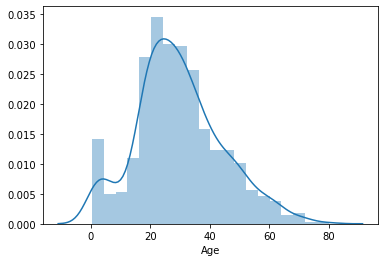

In [10]:
# we will have to replace the missing values in Age with appropriate values
# in order to find the appropriate values, will look at the Age distribution

sns.distplot(df2['Age'])
plt.show()

In [11]:
# since the Age distribution shows a normal curve, we can use the median value to replace the missing values

print("Median value of Age: ",df2['Age'].median())
print("Mean value of Age: ",df2['Age'].mean())

# not much of difference between mean and median values of Age; will consider the median value for imputation
df2['Age'].fillna(df2['Age'].median(), inplace=True)
print("Number of missing values under Age, after imputation: ", df2['Age'].isnull().sum())

# now, Age doesn't have any more missing values

Median value of Age:  28.0
Mean value of Age:  29.69911764705882
Number of missing values under Age, after imputation:  0


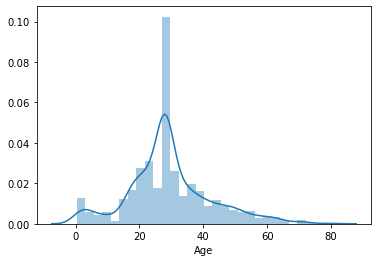

In [12]:
# let us re-look at the Age distribution after treating the missing values

sns.distplot(df2['Age'])
plt.show()

# after imputation, the median age of 28 year has many occurences

In [13]:
# we will replace the missing values in Embarked field with the mode
# finding the mode of Embarked
df2['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [14]:
# replacing the missing values under Embarked field
df2['Embarked'].fillna('S', inplace=True)
df2.isnull().sum()

# now there are no more missing values in the dataset

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

## Dropping Unnecessary fields

In [16]:
# fields like PassengerId, Name, Cabin, Ticket will not be useful for finding any pattern in the dataset
# will drop these fields from the dataset
df2.drop('PassengerId', axis=1, inplace=True)
df2.drop('Name', axis=1, inplace=True)
df2.drop('Ticket', axis=1, inplace=True)

df2.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


## Treating Outliers

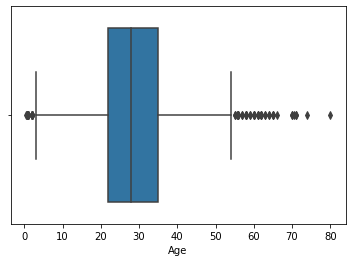

In [17]:
# there are two numerical fields and will have to check if there are any outliers
# checking for outliers in Age with boxplots

sns.boxplot(df2['Age'], data=df2)
plt.show()

In [18]:
# calculating IQR for Age distribution
Q1=df2['Age'].quantile(0.25)
Q3=df2['Age'].quantile(0.75)
print("Q1: ",Q1)
print("Q3: ",Q3)
IQR=Q3-Q1

Q1:  22.0
Q3:  35.0


In [19]:
upper_age_limit=Q3+1.5*IQR
lower_age_limit=Q1-1.5*IQR
print("upper age limit for analysis: ",upper_age_limit)
print("lower age limit for analysis: ",lower_age_limit)

upper age limit for analysis:  54.5
lower age limit for analysis:  2.5


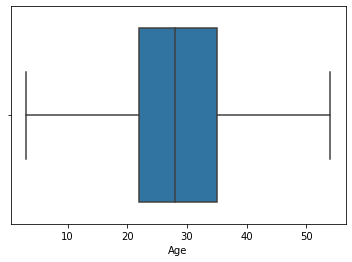

Minimum Age:  3.0
Maximum Age:  54.0


In [20]:
# filtering the outliers and changing their values to upper/ lower limits

df2.loc[df2['Age']>upper_age_limit, 'Age']=54
df2.loc[df2['Age']<lower_age_limit, 'Age']=3

# after treating the outliers in Age, let us check Age boxplot again
sns.boxplot(df2['Age'], data=df2)
plt.show()
print("Minimum Age: ",df2['Age'].min())
print("Maximum Age: ",df2['Age'].max())

# now, there are no more outliers in Age data, it lies between 3 and 54

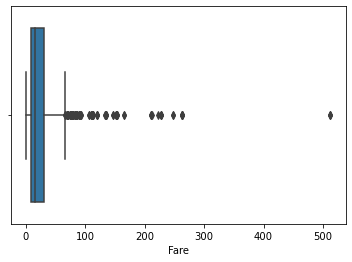

In [21]:
# treating outliers for Fare in the same manner

sns.boxplot(df2['Fare'], data=df2)
plt.show()

In [22]:
# calculating IQR for Age distribution
P1=df2['Fare'].quantile(0.25)
P3=df2['Fare'].quantile(0.75)
print("Q1: ",P1)
print("Q3: ",P3)
IPR=P3-P1

Q1:  7.9104
Q3:  31.0


In [23]:
upper_fare_limit=P3+1.5*IPR
lower_fare_limit=P1-1.5*IPR
print("upper fare limit for analysis: ",upper_fare_limit)
print("lower fare limit for analysis: ",lower_fare_limit)

upper fare limit for analysis:  65.6344
lower fare limit for analysis:  -26.724


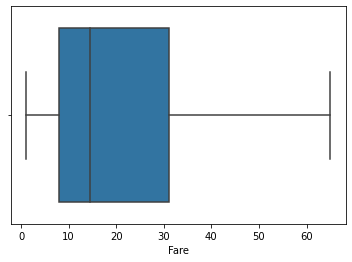

Minimum Fare:  1.0
Maximum Fare:  65.0


In [24]:
# lower limit fare cannot be negative, so will consider 1 as lower limit for Fare
# filtering the outliers and changing their values to upper/ lower limits

df2.loc[df2['Fare']>upper_fare_limit, 'Fare']=65
df2.loc[df2['Fare']<lower_age_limit, 'Fare']=1

# after treating the outliers in Fare, let us check Fare boxplot again
sns.boxplot(df2['Fare'], data=df2)
plt.show()
print("Minimum Fare: ",df2['Fare'].min())
print("Maximum Fare: ",df2['Fare'].max())

# now, there are no more outliers in Fare data, it lies between 1 and 65

## Analyzing the Categorical data

In [25]:
# reviewing the basic statistics of the data
df2.describe(include='all')

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891,891.000000,891.000000,891.000000,891.000000,891
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,646
mean,0.383838,2.308642,NaN,29.029181,0.523008,0.381594,23.981055,NaN
std,0.486592,0.836071,NaN,11.993174,1.102743,0.806057,20.294678,NaN
min,0.000000,1.000000,NaN,3.000000,0.000000,0.000000,1.000000,NaN
25%,0.000000,2.000000,NaN,22.000000,0.000000,0.000000,7.910400,NaN
50%,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,14.454200,NaN
75%,1.000000,3.000000,NaN,35.000000,1.000000,0.000000,31.000000,NaN


### Inference
- Age: mean age 29, half of the passengers were between 22 and 35 years
- Fare: mean fare 24, half of the passengers had a fare between 7.9 and 31

In [26]:
# Target variable : Survived (will try to predict the chances of a passenger's survival based on all the parameters )

### Relation between Survived and Sex

In [27]:
# How many males and females are in the dataset
df2.groupby('Sex').count()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked
Sex,,,,,,,
female,314,314,314,314,314,314,314
male,577,577,577,577,577,577,577


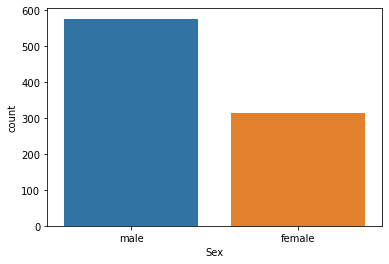

In [28]:
sns.countplot(x='Sex', data=df2)
plt.show()

In [29]:
# How many males and females survived?

df2.groupby('Sex')['Survived'].sum()

Sex
female    233
male      109
Name: Survived, dtype: int64

In [30]:
# proportion of male and female survival rate
((df2.groupby('Sex')['Survived'].sum())/(df2.groupby('Sex')['Survived'].count()))*100

Sex
female    74.203822
male      18.890815
Name: Survived, dtype: float64

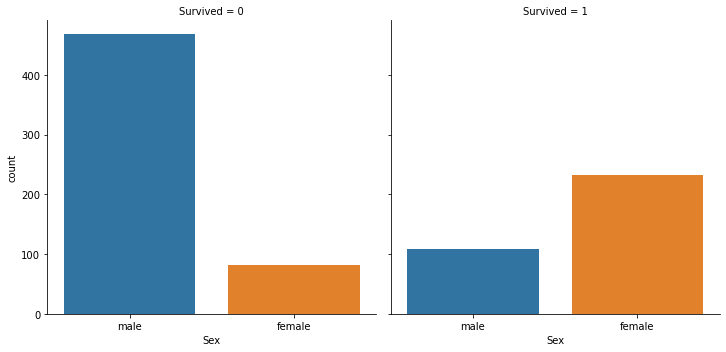

In [31]:
# checking the proportion visually
sns.catplot(x='Sex', col='Survived', data=df2, kind='count')
plt.show()

## Inference
- There is a relation between gender and survival rate
- Higher proportion of females survived, while for males, lower proportions of male passengers survived

## Relation between survival and embarkment

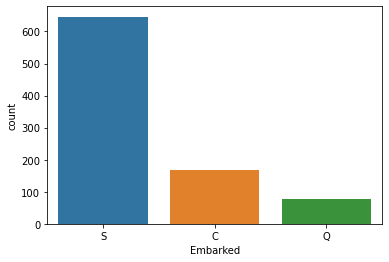

In [32]:
sns.countplot(x='Embarked', data=df2)
plt.show()

In [33]:
# proportion of S, C and Q survival rate
((df2.groupby('Embarked')['Survived'].sum())/(df2.groupby('Embarked')['Survived'].count()))*100

Embarked
C    55.357143
Q    38.961039
S    33.900929
Name: Survived, dtype: float64

## Inference
- Passengers who embarked from C had half a chance of survival
- Passengers who embarked from Q or S had lesser chances of survival

## Relation between Survival and Pclass

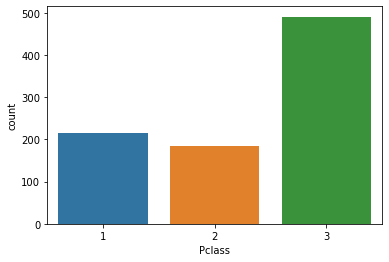

In [34]:
sns.countplot(x='Pclass', data=df2)
plt.show()

In [35]:
# proportion of Pclass 1, 2 and 3 survival rate
((df2.groupby('Pclass')['Survived'].sum())/(df2.groupby('Pclass')['Survived'].count()))*100

Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64

## Inference
- Class 1 passengers had a 63% survival rate
- Class 3 passengers had a 24% survival rate
- Class 2 passengers had a half a chance of survival
- Majority of the passengers were in Class 3, and did not survive
- Hence, there is a relation between class and survival rate

In [36]:
# proportion of different combination of Sex, Pclass and Embarked with Survival rate

((df2.groupby(['Sex','Pclass','Embarked'])['Survived'].sum())/(df2.groupby(['Sex','Pclass','Embarked'])['Survived'].count()))*100

Sex     Pclass  Embarked
female  1       C            97.674419
                Q           100.000000
                S            96.000000
        2       C           100.000000
                Q           100.000000
                S            91.044776
        3       C            65.217391
                Q            72.727273
                S            37.500000
male    1       C            40.476190
                Q             0.000000
                S            35.443038
        2       C            20.000000
                Q             0.000000
                S            15.463918
        3       C            23.255814
                Q             7.692308
                S            12.830189
Name: Survived, dtype: float64

## Survival rate distribution
- female in class 1 and 2 - more than 90%
- female in class 3 and from C or Q - 65% to 70%
- female in class 3 from S - 37%
- male in class 1 - 35% to 40%
- male in class 2 and 3 - less than 20%

## Analyzing Numerical variables

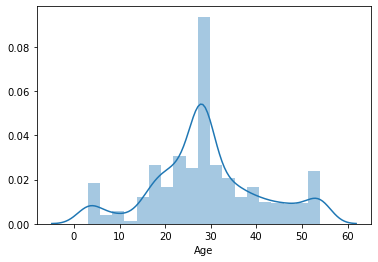

In [37]:
# distribution of age through distplot
sns.distplot(df2['Age'])
plt.show()

In [38]:
df2.groupby('Survived')['Age'].mean()

Survived
0    29.598361
1    28.115497
Name: Age, dtype: float64

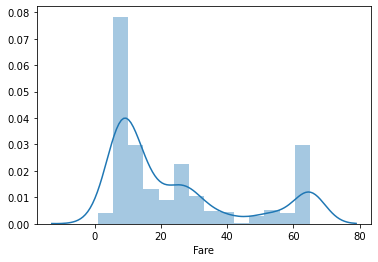

In [39]:
# distribution of Fare through distplot
sns.distplot(df2['Fare'])
plt.show()

In [40]:
df2.groupby('Survived')['Fare'].mean()

Survived
0    18.900993
1    32.135893
Name: Fare, dtype: float64

In [41]:
print(df2.groupby(['Survived','Sex'])['Age'].mean())
print(df2.groupby(['Survived','Sex'])['Fare'].mean())

Survived  Sex   
0         female    25.679012
          male      30.276709
1         female    28.560086
          male      27.165138
Name: Age, dtype: float64
Survived  Sex   
0         female    20.718830
          male      18.586367
1         female    33.799894
          male      28.578899
Name: Fare, dtype: float64


## Inference
- Passengers with higher fare had greater chances of survival
- older females and younger males had slightly greater chances of survival

## Let us check the correlation among different variables

In [42]:
df2.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.060163,-0.035322,0.081629,0.317325
Pclass,-0.338481,1.000000,-0.340483,0.083081,0.018443,-0.716683
Age,-0.060163,-0.340483,1.000000,-0.239291,-0.178517,0.145038
SibSp,-0.035322,0.083081,-0.239291,1.000000,0.414838,0.332573
Parch,0.081629,0.018443,-0.178517,0.414838,1.000000,0.293535
Fare,0.317325,-0.716683,0.145038,0.332573,0.293535,1.000000


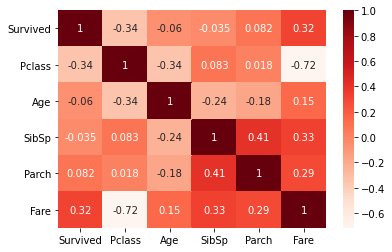

In [45]:
# correlation in a heatmap

sns.heatmap(df2.corr(), annot=True, cmap='Reds')
plt.show()

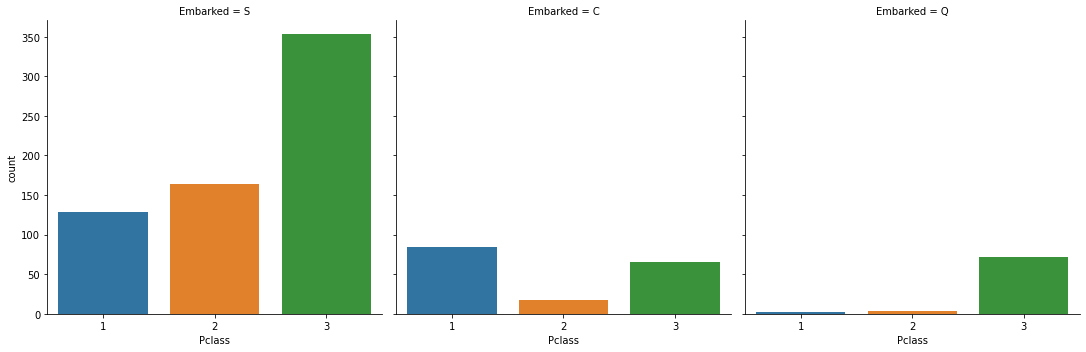

In [50]:
# since there is a pattern that passengers embarking at C had higher chances of survival, let us see if it is related to any other variable, or Embarked itself has a pattern
# will check the relation between Embarked and Pclass
# checking the proportion visually
sns.catplot(x='Pclass', col='Embarked', data=df2, kind='count')
plt.show()

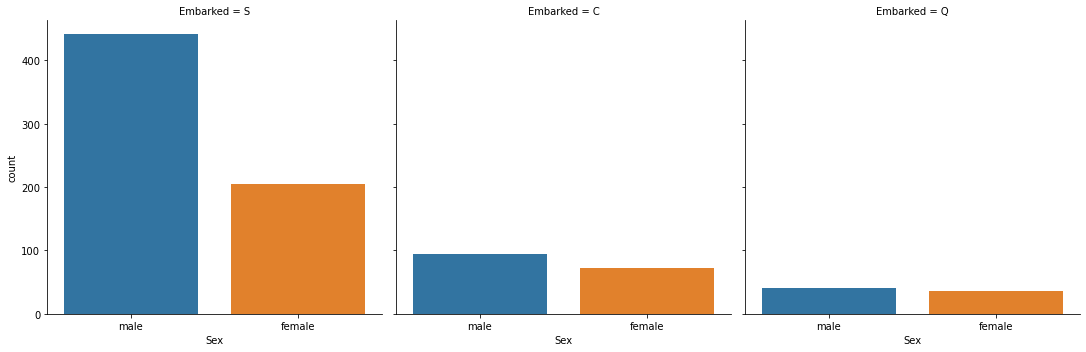

In [51]:
# will also check the relation between Embarked and Sex
# checking the proportion visually
sns.catplot(x='Sex', col='Embarked', data=df2, kind='count')
plt.show()

## Inference
- C had higher proportion of higher class passengers
- rate of survival for higher class passengers were higher, hence C independently did not seem to have a significant pattern

## Final Conclusions
- If the passenger was a female, her chances of survival is as high as 74%
- But if the passenger was a male, there is only 18% chance that he survived
- If the passenger was travelling higher class, there was higher chances of survival
- A female passenger travelling in class 1 or 2 had a 90% surival chance
- A male passenger travelling in lower class had less than 20% chances of survival
- older female and younger male had slightly higher chances of survival (not a significantly higher chance)